In [2]:
import pandas as pd
import numpy as  np
from sqlalchemy import create_engine,inspect,func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [3]:
# Read in both data tables to pandas
engine = create_engine("sqlite:///Data/hawaii.sqlite")
Base = automap_base()

contents = inspect(engine)
Base.prepare(engine,reflect = True)
Base.classes.keys()

['measurement', 'station']

In [4]:
columns_measurement = contents.get_columns('measurement')
display(columns_measurement)

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [5]:
display(contents.get_columns('station'))

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [5]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
session = Session(engine)

In [7]:
#First Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [8]:
#last Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [9]:
session.query(Station.station).all()

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [30]:
measurement_df = pd.read_sql("SELECT * FROM measurement",con = engine)
station_df = pd.read_sql("SELECT * FROM station",con = engine)

#Verify data import
display(measurement_df)
display(station_df)
display(measurement_df.dtypes)
display(measurement_df.count())

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


id           int64
station     object
date        object
prcp       float64
tobs       float64
dtype: object

id         19550
station    19550
date       19550
prcp       18103
tobs       19550
dtype: int64

## Precipitation Analysis

In [15]:

rainfall = pd.read_sql("""
SELECT date AS Date, prcp As Precipitation
FROM measurement 
WHERE Date > DATE('2016-08-23')
ORDER BY Date ASC;
                       """,con = engine).dropna().set_index("Date")
rainfall

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:xlabel='Date'>

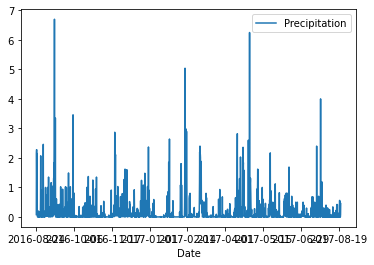

In [17]:
rainfall.plot()

In [14]:
rainfall.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [21]:
station_df["station"].count()

9

In [27]:
#most active station

ma = (pd.read_sql("""
SELECT station
FROM measurement
GROUP BY station
ORDER BY count(prcp) DESC
LIMIT 1;
""",con = engine)
      .values.tolist())
display(ma)

[['USC00519281']]

In [40]:
activestation_data = pd.read_sql("""
SELECT tobs AS Temperature
FROM  measurement
WHERE Date > DATE('2016-08-23') AND station = :ma""", con = engine)
display(activestation_data)

,Temperature
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


<AxesSubplot:ylabel='Frequency'>

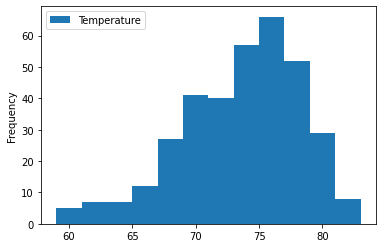

In [132]:
activestation_data.plot.hist(bins = 12)